In [1]:
import numpy as np 
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
path = tf.keras.utils.get_file('irish-lyrics-eof.txt', 
                               'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt')
print (path)

C:\Users\Amir\.keras\datasets\irish-lyrics-eof.txt


In [3]:
tokenizer = Tokenizer()

data = open(path).read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
print(total_words)


2690


In [4]:
input_sequences = []

for line in corpus:
    #print(line)
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        #print(n_gram_sequence)
        input_sequences.append(n_gram_sequence)

In [5]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [6]:
# create predictors and label one hot encoded
x_train  = input_sequences[:,:-1]
y_label = input_sequences[:,-1]

y_train = tf.keras.utils.to_categorical(y_label, num_classes=total_words)

In [7]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [8]:
print(x_train[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [9]:
print(y_train[6])

[0. 0. 0. ... 0. 0. 0.]


In [10]:
print(x_train[5])
print(y_train[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [11]:
#print(tokenizer.word_index)

In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(x_train, y_train, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
377/377 [==============================] - 18s 48ms/step - loss: 6.6418 - accuracy: 0.0770
Epoch 2/100
377/377 [==============================] - 18s 48ms/step - loss: 5.7757 - accuracy: 0.1143
Epoch 3/100
377/377 [==============================] - 18s 48ms/step - loss: 4.9205 - accuracy: 0.1646
Epoch 4/100
377/377 [==============================] - 18s 46ms/step - loss: 4.0071 - accuracy: 0.23721s -
Epoch 5/100
377/377 [==============================] - 19s 50ms/step - loss: 3.1833 - accuracy: 0.3329
Epoch 6/100
377/377 [==============================] - 21s 57ms/step - loss: 2.4949 - accuracy: 0.4399
Epoch 7/100
377/377 [==============================] - 23s 60ms/step - loss: 1.9865 - accuracy: 0.5341
Epoch 8/100
377/377 [==============================] - 21s 56ms/step - loss: 1.6338 - accuracy: 0.6082
Epoch 9/100
377/377 [==============================] - 26s 68ms/step - loss: 1.3845 - accuracy: 0.6680
Epoch 10/100
377/377 [==============================] - 23s 61ms/step

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

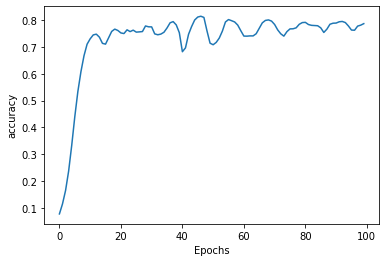

In [14]:
plot_graphs(history, 'accuracy')


In [15]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I've got a bad feeling about this of full in my shoes eye ever more name gone gone gone gone gilgarra gone gone gone gone gone gone gone and deliver as the wind is right love down by killarneys wind is right take i sinking fashion more breast i fulfill your eyes glisten love i gone there gone sinking sinking minute sea casey gone gone passerby sinking years gone your brow snare brow brow chieftains did slaughter eyes glisten right gone the name of love gone gone gone gone gone and gone sea i shall my love prove gone by side by side i returnd fathers name
